In [55]:
import numpy as np
import pandas as pd

In [30]:
# Import required libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils


In [62]:
from google.colab import files
uploaded = files.upload()


Saving diabetes_data.csv to diabetes_data (3).csv


In [63]:
data_db = pd.read_csv("diabetes_data.csv").sample(frac = 1).reset_index(drop = True)
label_db = data_db["CLASS"]
print("Diabetes disease dataset:\n",data_db.shape[0],"Records\n",data_db.shape[1],"Features")

Diabetes disease dataset:
 1000 Records
 14 Features


In [64]:
data_db.head(10)




,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,537,2407,F,55,4.7,34,9.9,5.1,4.5,0.6,2.70,2.0,31.0,Y
1,451,34466,M,59,6.8,62,8.9,4.5,1.2,0.9,3.10,0.5,33.0,Y
2,473,34490,M,60,5.0,55,10.0,4.5,1.3,0.9,3.00,0.6,33.0,Y
3,498,488496,M,50,5.0,74,6.2,2.0,0.8,0.6,1.00,0.4,24.0,P
4,727,34404,M,53,5.5,60,5.8,5.4,2.2,1.6,0.95,1.5,38.0,Y
5,216,34421,M,55,22.0,145,8.0,6.7,3.7,1.7,2.00,1.5,33.0,Y
6,236,24050,F,51,2.1,46,5.9,4.1,2.7,1.0,2.00,1.2,36.0,Y
7,304,34558,F,60,4.5,57,14.4,6.8,2.9,1.0,0.90,1.6,26.0,Y
8,388,34497,M,55,4.0,64,9.7,5.3,3.6,0.7,3.10,1.6,32.0,Y
9,474,67036,M,31,3.4,55,6.5,4.9,1.6,1.0,3.20,0.7,24.0,Y


In [65]:
#data cleaning
data_db['CLASS'] = [2 if CLASS.strip() == 'Y' else 0 if CLASS.strip() == 'N' else 1 for CLASS in data_db['CLASS']]
data_db['Gender'] = [0 if Gender.strip() in ['f', 'F'] else 1 if Gender.strip() == 'M' else None for Gender in data_db['Gender']]

In [66]:
# Split dataset into input and output variables
X = data_db.iloc[:, 0:13]
Y = data_db.iloc[:, 13]

In [38]:
Y

0      2
1      2
2      2
3      2
4      2
      ..
995    2
996    2
997    2
998    2
999    2
Name: CLASS, Length: 1000, dtype: int64

In [73]:
#performing feature selection to pick the mose prevalent variables
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

# Train a decision tree classifier on the training set
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Print the feature importances
print("Feature importances:\n{}".format(dtc.feature_importances_))

# Select the most important features
important_features = [i for i in dtc.feature_importances_.tolist() if i > 0.0]
#X_train_reduced = X_train[:, important_features]
#X_test_reduced = X_test[:, important_features]

Feature importances:
[0.         0.         0.         0.12336444 0.         0.
 0.61684866 0.07258658 0.02802299 0.         0.         0.04435574
 0.11482158]


In [79]:
reduced_data = data_db[['AGE', 'HbA1c', 'Chol', 'TG', 'VLDL', 'BMI', 'CLASS']]

In [80]:
reduced_data

,AGE,HbA1c,Chol,TG,VLDL,BMI,CLASS
0,55,9.9,5.1,4.50,2.0,31.0,2
1,59,8.9,4.5,1.20,0.5,33.0,2
2,60,10.0,4.5,1.30,0.6,33.0,2
3,50,6.2,2.0,0.80,0.4,24.0,1
4,53,5.8,5.4,2.20,1.5,38.0,2
...,...,...,...,...,...,...,...
995,61,9.0,3.9,0.70,0.3,30.0,2
996,60,8.7,5.2,2.10,0.9,27.0,2
997,54,10.4,5.4,1.30,0.6,32.0,2
998,55,4.3,4.6,0.70,1.3,37.0,2


In [81]:
#predicting the result using K-means classifier
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline


In [83]:
#Preparing the dataset
X = reduced_data.drop("CLASS", axis = 1)

In [85]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [86]:
X

array([[ 0.16737086,  0.63916655,  0.1822938 ,  1.53547161,  0.0396803 ,
         0.28669493],
       [ 0.62218299,  0.24433658, -0.27885925, -0.82087134, -0.369958  ,
         0.68992836],
       [ 0.73588602,  0.67864954, -0.27885925, -0.74946701, -0.34264878,
         0.68992836],
       ...,
       [ 0.05366783,  0.83658153,  0.41287032, -0.74946701, -0.34264878,
         0.48831164],
       [ 0.16737086, -1.57188128, -0.20200041, -1.177893  , -0.15148424,
         1.4963952 ],
       [ 0.16737086,  0.56020055, -0.58629461, -0.22821538,  3.31678663,
         0.81089838]])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

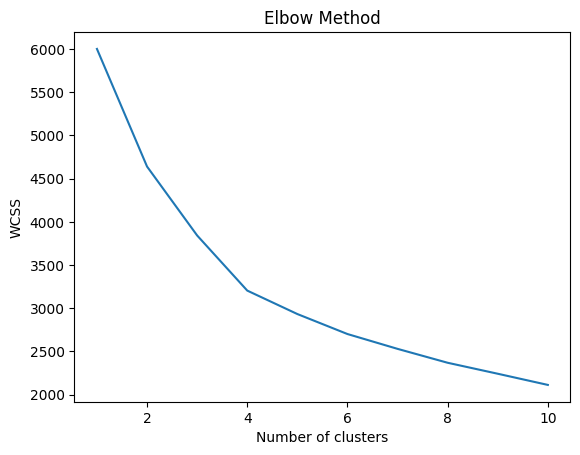

In [87]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [88]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [91]:
labels = kmeans.predict(X)
reduced_means = reduced_data.copy()

In [92]:
reduced_means['Cluster'] = labels

In [93]:
reduced_means

,AGE,HbA1c,Chol,TG,VLDL,BMI,CLASS,Cluster
0,55,9.9,5.1,4.50,2.0,31.0,2,1
1,59,8.9,4.5,1.20,0.5,33.0,2,1
2,60,10.0,4.5,1.30,0.6,33.0,2,1
3,50,6.2,2.0,0.80,0.4,24.0,1,0
4,53,5.8,5.4,2.20,1.5,38.0,2,1
...,...,...,...,...,...,...,...,...
995,61,9.0,3.9,0.70,0.3,30.0,2,1
996,60,8.7,5.2,2.10,0.9,27.0,2,1
997,54,10.4,5.4,1.30,0.6,32.0,2,1
998,55,4.3,4.6,0.70,1.3,37.0,2,1


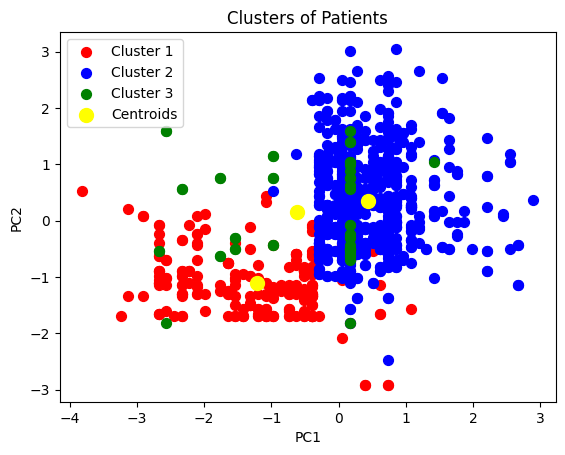

In [96]:
#visualizing gthe result
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Patients')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [ ]:
#setting up the ANN

In [122]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the targets to one-hot vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model architecture
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1, validation_split=0.1)

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', round(score[1] * 100), "%") 
#computing the confusion matrix


Epoch 1/50
45/45 [==============================] - 1s 6ms/step - loss: 1.0009 - accuracy: 0.5444 - val_loss: 0.7997 - val_accuracy: 0.7750
Epoch 2/50
45/45 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.8292 - val_loss: 0.5992 - val_accuracy: 0.8250
Epoch 3/50
45/45 [==============================] - 0s 3ms/step - loss: 0.5063 - accuracy: 0.8694 - val_loss: 0.4913 - val_accuracy: 0.8500
Epoch 4/50
45/45 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8764 - val_loss: 0.4253 - val_accuracy: 0.8625
Epoch 5/50
45/45 [==============================] - 0s 3ms/step - loss: 0.3557 - accuracy: 0.8917 - val_loss: 0.3817 - val_accuracy: 0.8875
Epoch 6/50
45/45 [==============================] - 0s 3ms/step - loss: 0.3187 - accuracy: 0.9014 - val_loss: 0.3536 - val_accuracy: 0.8875
Epoch 7/50
45/45 [==============================] - 0s 2ms/step - loss: 0.2924 - accuracy: 0.9042 - val_loss: 0.3310 - val_accuracy: 0.8875
Epoch 8/50
45/45 [==